# <center>Pattern recognition 3rd project</center>

![alt text](https://i.postimg.cc/NfzxXZBn/pr.png)


### Importing the necessary modules

In [55]:
# If you don't have the libraries installed
# !pip install numpy
# !pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time
from sklearn.ensemble import RandomForestClassifier

### Introduction

As research assistants at the __Floristic Laboratory of the Department of Agriculture, AUTH,__ specializing in
__data analysis__ and on the occasion of the research department in the laboratory concerning __automated recognition of different
species from a specific plant,__ __Iris,__ we undertook to __classify the species__ of this plant. The __three__ specific species are __Iris setosa, Iris versicolor and Iris virginica,__ which present __differences in the length and width__ of the __sepals__ and __petals__ of their flower.


From the __sklearn__ library we downloaded a database of __150 (50 for each species)__ measurements of the __lengths__ and
__width__ of the sepals and petals of the flower of each species. By isolating only the __first two features__
of the base, we used the ready-made __DecisionTreeClassifier__ algorithm from the sklearn library and classified
the __50%__ random samples of the set after first __training__ the algorithm with the __remaining 50%.__

## Part A
### Task 1
#### Task 1 Code:

The accuracies of the  classifications of the classifier for every depth are:
  Depth 1: 54.67%
  Depth 2: 72.00%
  Depth 3: 72.00%
  Depth 4: 73.33%
  Depth 5: 69.33%
  Depth 6: 70.67%
  Depth 7: 70.67%
  Depth 8: 72.00%
  Depth 9: 69.33%
  Depth 10: 70.67%
  Depth 11: 68.00%
  Depth 12: 69.33%
  Depth 13: 70.67%
  Depth 14: 69.33%
  Depth 15: 66.67%
Best tree depth is: 4 and the best percentage is: 73.33%


<IPython.core.display.Javascript object>


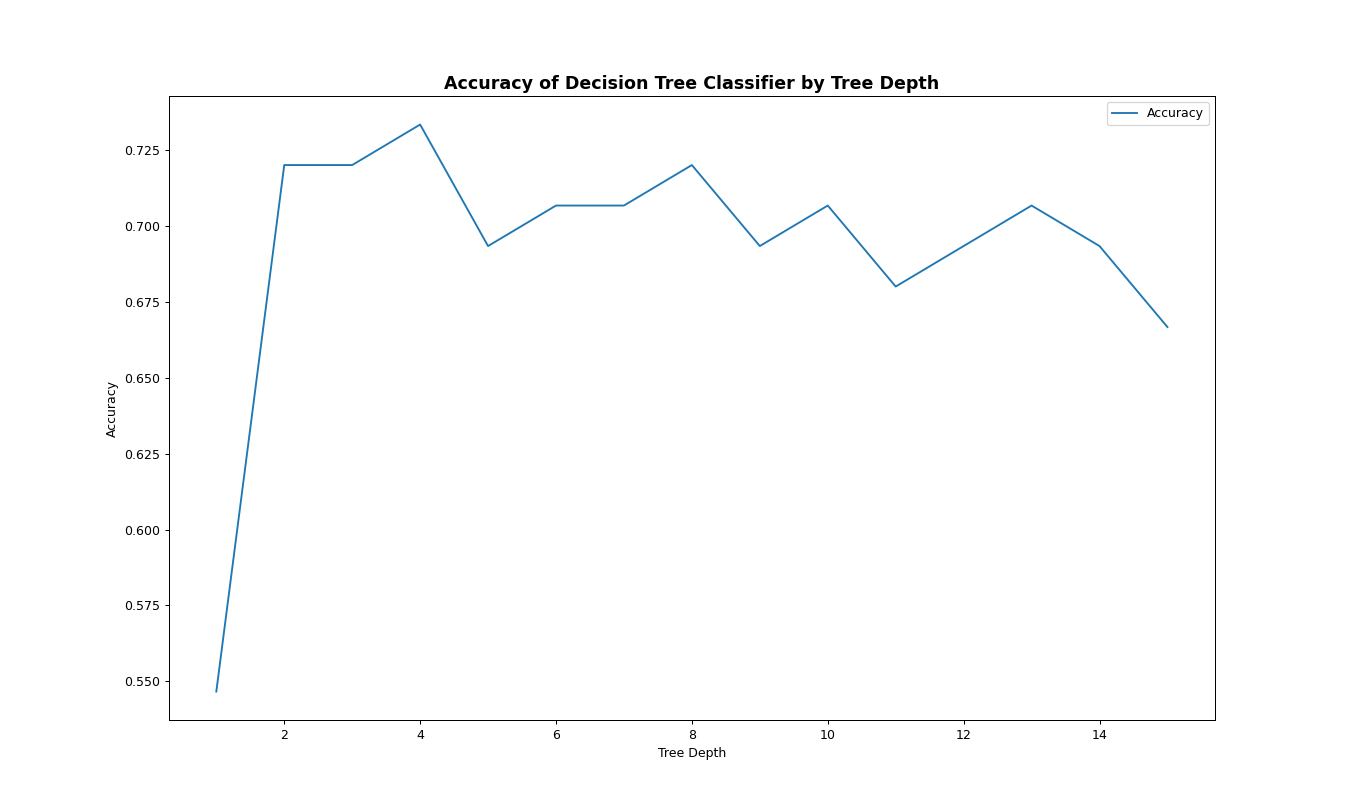

In [56]:
# Load the Iris dataset from scikit-learn
iris = datasets.load_iris()

# Get the features (sepal length and width) and labels (species)
X = iris['data'][:, :2]    # get first two features (sepal length and width)
Y = iris['target']         # get the labels (species)

# Randomize the indexes of X,Y by shuffling them independently
idx = np.random.permutation(len(X))
X = X[idx]
Y = Y[idx]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

# Set the tree depths
depths = [i+1 for i in range(15)]

# Initialize the accuracies
accuracies = []

# For all the tree depths calculate the accuracies
for i in depths:
    # Create a Decision Tree classifier object
    clf = DecisionTreeClassifier(max_depth=i)
    
    # Train the classifier with the training data
    clf.fit(X_train, Y_train)
    
    # Use the classifier to make predictions on the test data
    Y_pred = clf.predict(X_test)
    
    # Calculate the accuracy of the classifier
    acc = accuracy_score(Y_test, Y_pred)
    
    # Append the accuracy to the list
    accuracies.append(acc)

# Print the accuracies of all the depths
print('The accuracies of the  classifications of the classifier for every depth are:')
for depth, acc in zip(depths, accuracies):
    print('  Depth {}: {:.2f}%'.format(depth, acc * 100))
        
# The index of the maximum accuracy
max_index = np.argmax(accuracies)

# The tree depth with the highest accuracy
best_depth = depths[max_index]

# Print the best tree depth
print('Best tree depth is:', best_depth, 'and the best percentage is: {:.2f}%'.format(accuracies[best_depth-1]*100))

# ------------------------------------------------------------------------#
# PLOT OF ACCURACIES OF EVERY TREE DEPTH

# Create the plot 
fig = plt.figure(figsize=(15,9))
plt.plot(depths, accuracies)
plt.title('Accuracy of Decision Tree Classifier by Tree Depth', fontsize=14, fontweight='bold')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.show()

#### Presentation of Task 1:

#### Description of the code
The DecisionTreeClassifier algorithm from the sklearn library was used on the Iris dataset, which contains measurements of sepal length and width, as well as the type of iris flower. The classifier was trained on 50% of the data and tested on the remaining 50%. For the training of the classifier we took into account the first 15 tree depths (1-15) and the efficiency (accuracy) of the classifier at each of the corresponding depths was calculated. Finally it also prints the tree depth with the highest accuracy.

#### Same accuracy at two depths
In case two depths have the same precision, the classifier always chooses the smaller depth, as it is computationally advantageous.

#### The reason this final depth number was chosen
A larger final depth could have been chosen, but it was deemed computationally pointless, as the greater the depth the greater the complexity and thus the computational time.
However, the first 100 depths (1-100) of the tree were tested on our side and it was observed that 1/30 times on average, there was greater accuracy at a depth greater than 15 (usually quite less than 100) and it was usually quite close to accuracy, with a depth considerably less than this, so logically the smaller depth would have been chosen. That's why the number 15 was chosen.

However the code is made in such a way that it allows it to change the maximum number of degrees. This can be done by going to the "depths" variable and inside the "for", instead of 15 we put our desired depth.

#### Why the results differ from each other
Each time there is a shuffling of the data (using sklearn's shuffle function) in the training and validation sets so that there is a randomness in the samples and we don't always test the same sample and for this reason every time we run the program the results we get will be different.

#### Graph
Also added a graph, in which we can see the accuracy of our classifier depending on the depth it is at (on the x axis is the depth of the tree and on the y is the accuracy). Depending on the redistribution that will be done in the initial training and validation data we will have the corresponding results in the graph.

#### Conclusion
In conclusion, the accuracy of our classifier was quite good on the Iris dataset, with the corresponding results ranging from 60%-85%. It is worth noting that the performance of the classifier may vary, as there is redistribution of the data.

### Task 2
#### Task 2 Code:

<IPython.core.display.Javascript object>


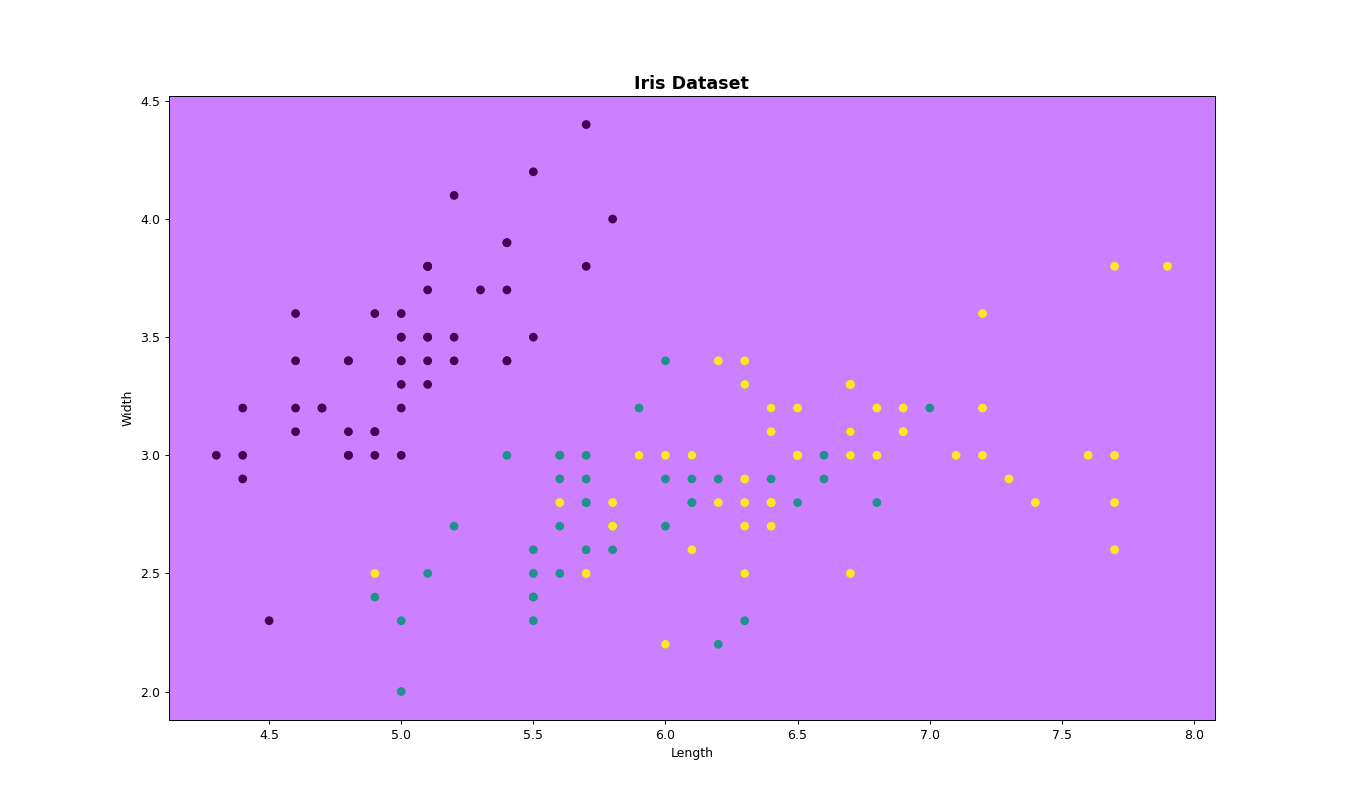

<IPython.core.display.Javascript object>


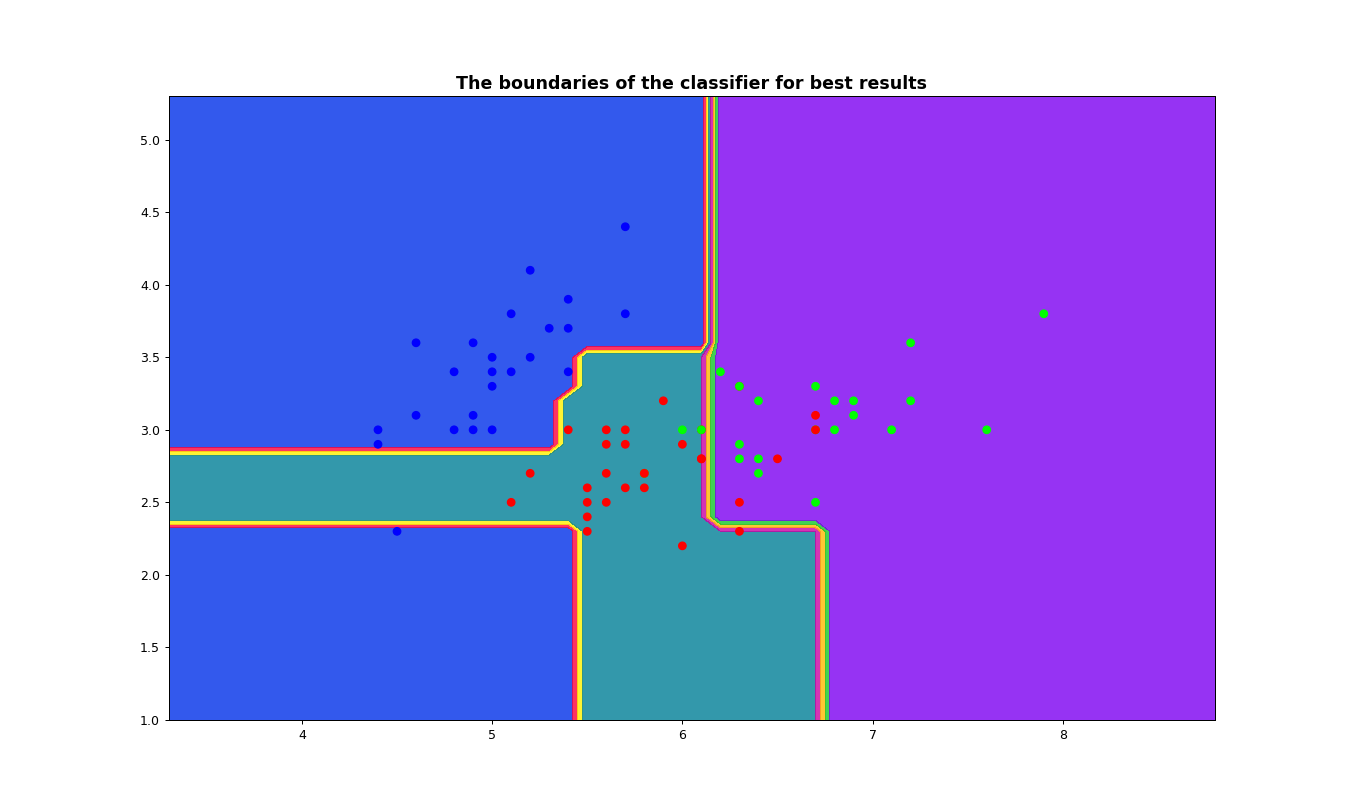

In [57]:
# PLOT THE INITIAL DATA
# Create the scatter plot
fig2 = plt.figure(figsize=(15,9))
ax = plt.axes()
ax.set_facecolor((0.8, 0.5, 1))
plt.scatter(iris['data'][:, 0], iris['data'][:, 1], c=iris['target'])
plt.title('Iris Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

# ------------------------------------------------------------------------#
# PLOT THE BOUNDARY LIMITS USING CONTOURF

# Create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

# Create a Decision Tree classifier object with the best depth from the previous task
clf = DecisionTreeClassifier(max_depth=best_depth)

# Train the classifier with the training data
clf.fit(X_train, Y_train)

# Use the classifier to make predictions (reshape it, because it needs a 2D array)
Z = clf.predict(np.stack((xx, yy), axis=-1).reshape(-1, 2))

# Create the plot
fig3 = plt.figure(figsize=(15,9))
plt.title('The boundaries of the classifier for best results', fontsize=14, fontweight='bold')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap="prism", alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap="brg")
plt.show()

#### Presentation of Task 2:

#### First chart
In the first graph we have the dispersion of the Iris data set. On the x-axis we have the length and on the y-axis the width. The color of each point represents the class of iris flower: setosa (dark purple), versicolor (light green) or virginica (yellow). We notice that the setosa class on the upper left is quite separable compared to the other two, i.e. the points that make it up can be easily separated with high precision in the classification compared to the other classes, whose points are difficult to separate without a misclassification rate.

#### Second chart
In the second graph we have the decision limits of our classifier on the Iris set, which we mentioned above. On the x-axis we have the length and on the y-axis the width. The color of each point represents the class of the iris flower: setosa (dark blue), versicolor (red) or virginica (green).

We notice again, that the decision limits of the setosa category are quite apt, as in almost all cases they cover exactly the whole set, without leaving any element outside of it.
Nevertheless, as mentioned above, the versicolor and virginica classes have elements that are mixed and make it difficult to make an easy choice at the boundaries of the decision areas.

#### Conclusion
From the diagrams we notice that we can predict to an excellent degree whether the flower given to us belongs to the setosa class or not.

Nevertheless, for the classes versicolor and virginica we cannot say with certainty the result and for this reason we come to the conclusion that the length and width as characteristics for the prediction of these two classes are not sufficient and should be to have a better accuracy to include some third characteristic, which would help us to classify them.

## Part Β
### Task 1
#### Task 1 code:

The accuracies of the classifications of the classifier for every depth are:
  Depth 1: 65.33%
  Depth 2: 73.33%
  Depth 3: 70.67%
  Depth 4: 70.67%
  Depth 5: 72.00%
  Depth 6: 72.00%
  Depth 7: 72.00%
  Depth 8: 73.33%
  Depth 9: 73.33%
  Depth 10: 73.33%
  Depth 11: 73.33%
  Depth 12: 70.67%
  Depth 13: 70.67%
  Depth 14: 70.67%
  Depth 15: 70.67%
  Depth 16: 70.67%
  Depth 17: 70.67%
  Depth 18: 70.67%
  Depth 19: 70.67%
  Depth 20: 70.67%
  Depth 21: 70.67%
  Depth 22: 70.67%
  Depth 23: 70.67%
  Depth 24: 70.67%
  Depth 25: 70.67%
  Depth 26: 70.67%
  Depth 27: 70.67%
  Depth 28: 73.33%
  Depth 29: 73.33%
  Depth 30: 73.33%
  Depth 31: 73.33%
  Depth 32: 73.33%
  Depth 33: 73.33%
  Depth 34: 73.33%
  Depth 35: 73.33%
  Depth 36: 72.00%
  Depth 37: 72.00%
  Depth 38: 72.00%
  Depth 39: 72.00%
  Depth 40: 72.00%
  Depth 41: 72.00%
  Depth 42: 72.00%
  Depth 43: 72.00%
  Depth 44: 72.00%
  Depth 45: 70.67%
  Depth 46: 70.67%
  Depth 47: 70.67%
  Depth 48: 70.67%
  Depth 49: 70.67%
 

<IPython.core.display.Javascript object>


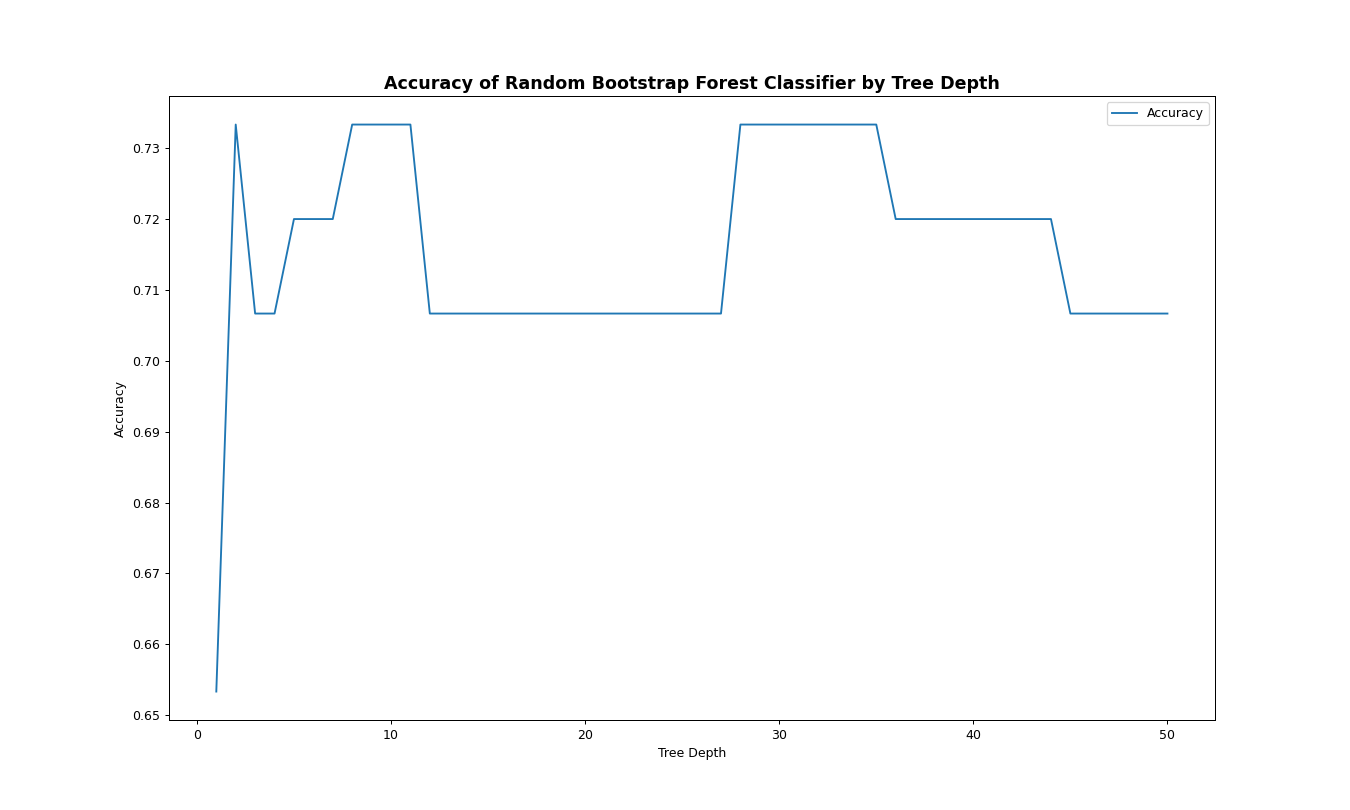

In [58]:
# Set the tree depths
depths = [i+1 for i in range(50)]

# Initialize the accuracies
accuracies = []

# Initialize the trees of the forest
trees = []

# For all the tree depths calculate the accuracies
for i in depths:
    # Create a Decision Tree classifier object
    clf = RandomForestClassifier(n_estimators=100,max_depth=i,max_samples=0.5,bootstrap=True,random_state=int(time.time()))
    
    # Train the classifier with the training data
    clf.fit(X_train, Y_train)
    
    # Append the clf to the list
    trees.append(clf)
    
    # Use the classifier to make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy of the classifier
    acc = accuracy_score(Y_test, y_pred)
    
    # Append the accuracy to the list
    accuracies.append(acc)

# Print the accuracies of all the depths
print('The accuracies of the classifications of the classifier for every depth are:')
for depth, acc in zip(depths, accuracies):
    print('  Depth {}: {:.2f}%'.format(depth, acc * 100))
        
# The index of the maximum accuracy
max_index = np.argmax(accuracies)

# The tree depth with the highest accuracy
best_depth = depths[max_index]

# Print the best tree depth
print('Best tree depth is:', best_depth, 'and the best percentage is: {:.2f}%'.format(accuracies[best_depth-1]*100))

# ------------------------------------------------------------------------#
# PLOT OF ACCURACIES OF EVERY TREE DEPTH

# Create the plot 
fig = plt.figure(figsize=(15,9))
plt.plot(depths, accuracies)
plt.title('Accuracy of Random Bootstrap Forest Classifier by Tree Depth', fontsize=14, fontweight='bold')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.show()

#### Presentation of Task 1:

#### Description of the code
The RandomForestClassifier algorithm from the sklearn library was used. This classifier differs from the previous one in that it reduces the random errors, due to the bootstrap method, because it limits the isolated values that can occur by redistributing the sample given to it.

#### The reason this final depth number was chosen
A greater or lesser final depth could have been chosen. But we know that the greater the depth, the greater the complexity and consequently the computing time. So we checked the first 100 depths (1-100) of the tree and chose the smallest of the depths, which gives us an easy-to-read diagram with sufficiently high accuracy. That is, we chose the depth of 50.

However the code is made in such a way that it allows it to change the maximum number of degrees. This can be done by going to the "depths" variable and inside the "for", instead of 50 we put our desired depth. The best choice would be __large values__ , so that the change made in the depths can be observed.

#### Same accuracy at two depths
In case two depths have the same precision, the classifier always chooses the smaller depth, as it is computationally advantageous.

Also compared to the previous classifier, this one finds the maximum value at a greater depth than the previous one, due to the bootstrap method.

#### Graph
In the graph above we notice that the answers differ depending on when we run the program, as the sample changes depending on the time we run it. However, when we run it, we don't see constant values in successive trees, but quite fluctuating ones.


#### Evaluation of the algorithm
At this point we will refer to the correct classification rate of the RandomForestClassifier algorithm. We have created a variable (acc), which calculates the reliability of the algorithms, in relation to their percentage of correct classification. We see that __RandomForestClassifier__ shows a value usually of 65 and above, higher than the previous classifier (this will be further explained in the next question).

#### From the diagram we see that:
The depth of the tree that gives the best classification rate is usually depth 2-6, which gives the rate we mentioned above. Also most values of classification rates for all depths (from 0-100) except 1 are most often above 73%. For depth 1, it usually shows the lowest value.

### Task 2
#### Task 2 code:

<IPython.core.display.Javascript object>


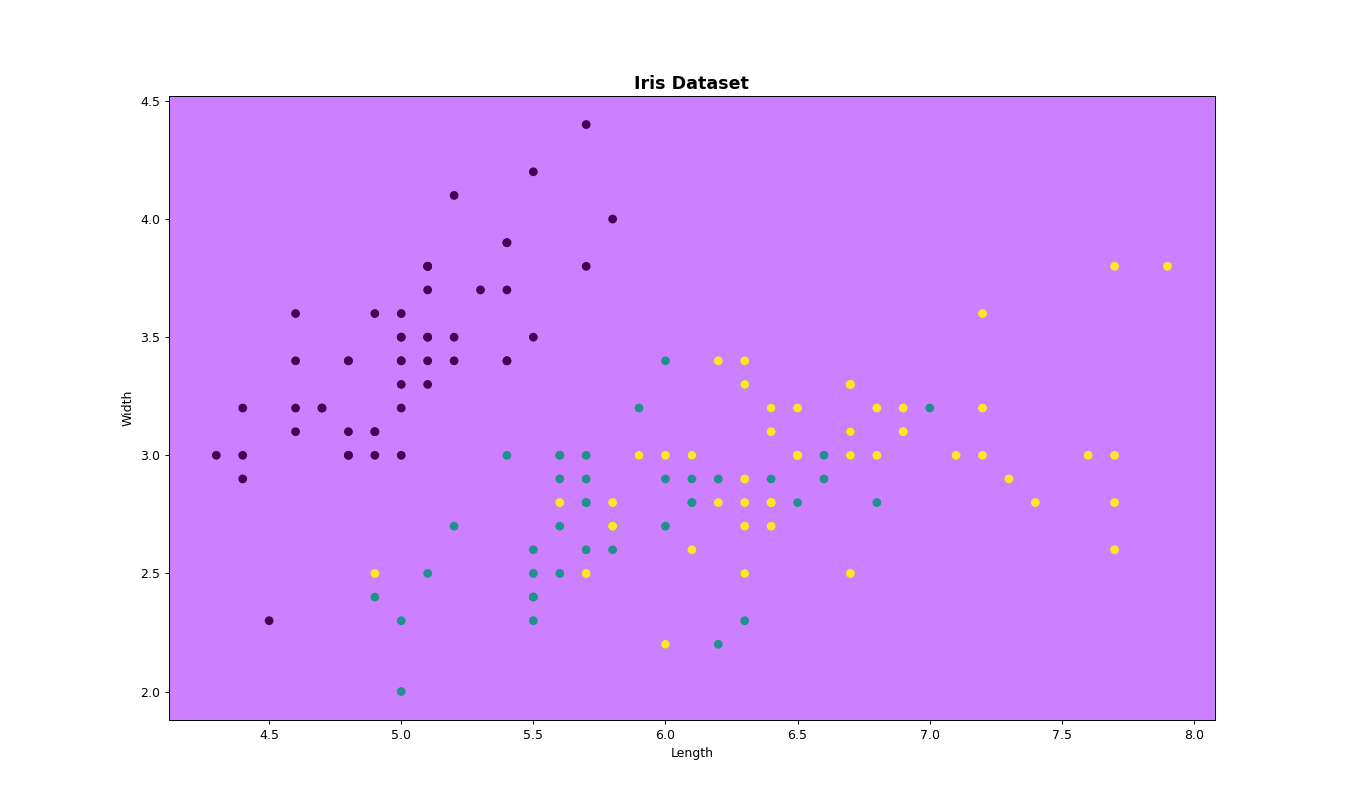

<IPython.core.display.Javascript object>


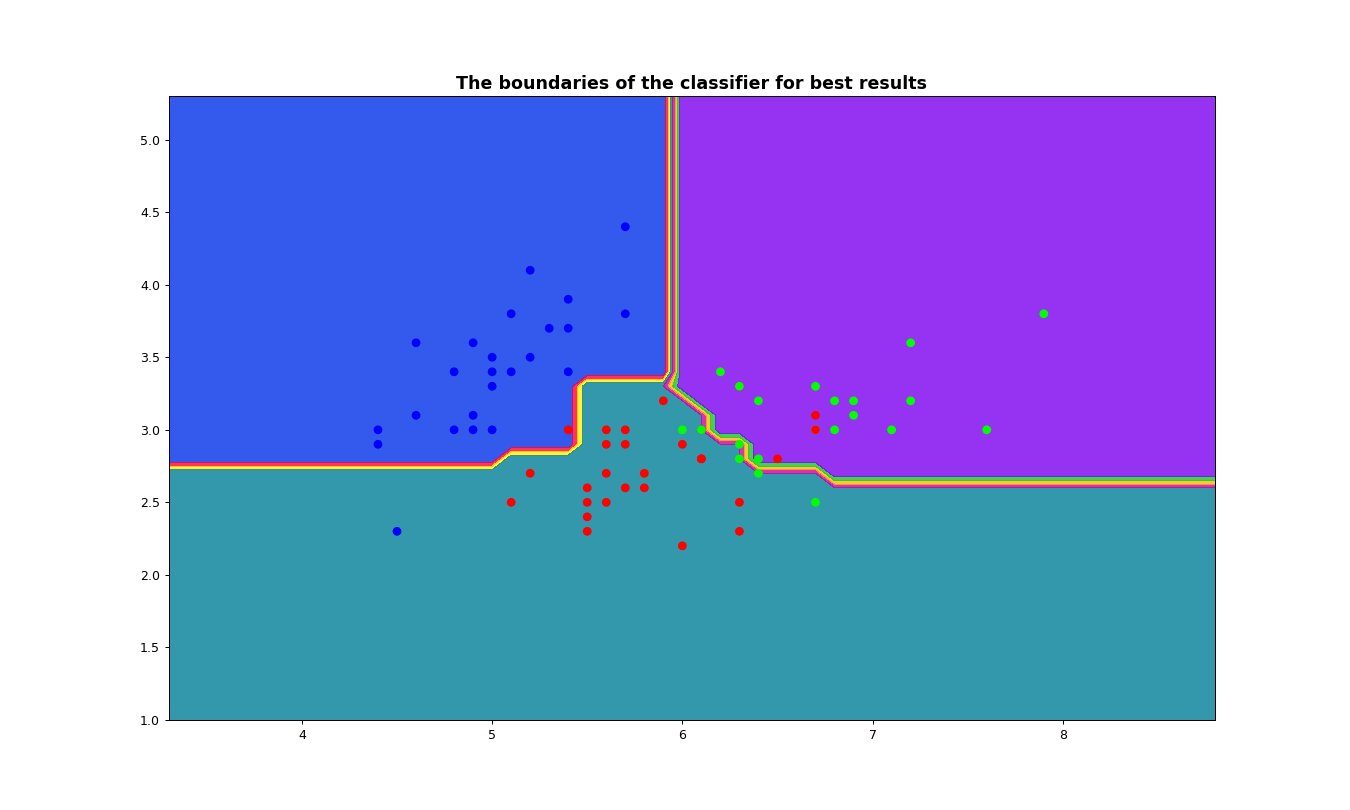

In [59]:
# PLOT THE INITIAL DATA
# Create the scatter plot
fig3 = plt.figure(figsize=(15,9))
ax = plt.axes()
ax.set_facecolor((0.8, 0.5, 1))
plt.scatter(iris['data'][:, 0], iris['data'][:, 1], c=iris['target'])
plt.title('Iris Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

# ------------------------------------------------------------------------#
# PLOT THE BOUNDARY LIMITS USING CONTOURF

# Create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

# Create a Decision Tree classifier object with the best depth from the previous task
clf = RandomForestClassifier(max_depth=best_depth)

# Train the classifier with the training data
clf.fit(X_train, Y_train)

# Use the classifier to make predictions (reshape it, because it needs a 2D array)
Z = clf.predict(np.stack((xx, yy), axis=-1).reshape(-1, 2))

# Create the plot
fig3 = plt.figure(figsize=(15,9))
plt.title('The boundaries of the classifier for best results', fontsize=14, fontweight='bold')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap="prism", alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap="brg")
plt.show()

#### Presentation of Task 2:

#### First chart
In the first graph we have the dispersion of the Iris data set. On the x-axis we have the length and on the y-axis the width. The color of each point represents the class of iris flower: setosa (dark purple), versicolor (light green) or virginica (yellow). We notice that the setosa category located on the left and above is quite separable compared to the other two, i.e. the points that make it up can be separated with relative precision in the classification. The other two classes, versicolor (light green) and virginica (yellow) located on the right and in the lower-center part of the graph, respectively, appear to be more mixed. For virginica and versicolor, then, we find it difficult to separate their points without a fairly large misclassification rate.

#### Second chart
In the second graph we have the decision limits of our classifier on the Iris set, which we mentioned above. On the x-axis we have the length and on the y-axis the width. The color of each point represents the class of the iris flower: setosa (dark blue), versicolor (red) or virginica (green).

We notice again, that the decision limits of the setosa category are generally appropriate, as in one case they cover almost the whole set, i.e. leave only one element outside it and having within the limits, only one element from the versicolor category.
The versicolor and virginica classes have many elements mixed together and make it difficult to make an easy choice at the boundaries of the decision areas. Nevertheless, the decision regions are much better matched to our sample than the previous classifier.

#### Conclusion
From the diagrams we notice that we can predict with a great but not absolute accuracy, whether the flower given to us belongs to the setosa class or not. Also, the only case for the flower not to be correctly identified as a setosa, is if it is a versicolor. The chances of such an error occurring are small.

For the classes versicolor and virginica we cannot say with absolute certainty the result and for this reason we come to the conclusion that the length and width as characteristics for the prediction of these two classes are not sufficient and to have better accuracy we should include and some third characteristic, which would help us to classify them.

#### Comparison with simple classifier
* As for the __setosa__ category, it was completely separable from the others with absolute precision, using a simple classifier. Now that the bootstrap classifier has been used, its decision bounds remain quite accurate, perhaps more so.

* Regarding the __versicolor__ and __virginica__ classes, either using simple or bootstrap classifier, they are quite mixed and cannot be safely separated. It seems that some third feature should be included to separate them more precisely.

* The decision regions of this classifier, compared to the simple one, are more specific to the respective data and are less separated from each other than the previous one.

* Although we have more valid results for this classifier, it is slower in time than the first one (at the same depth of trees).

#### Task 3 code:

<IPython.core.display.Javascript object>


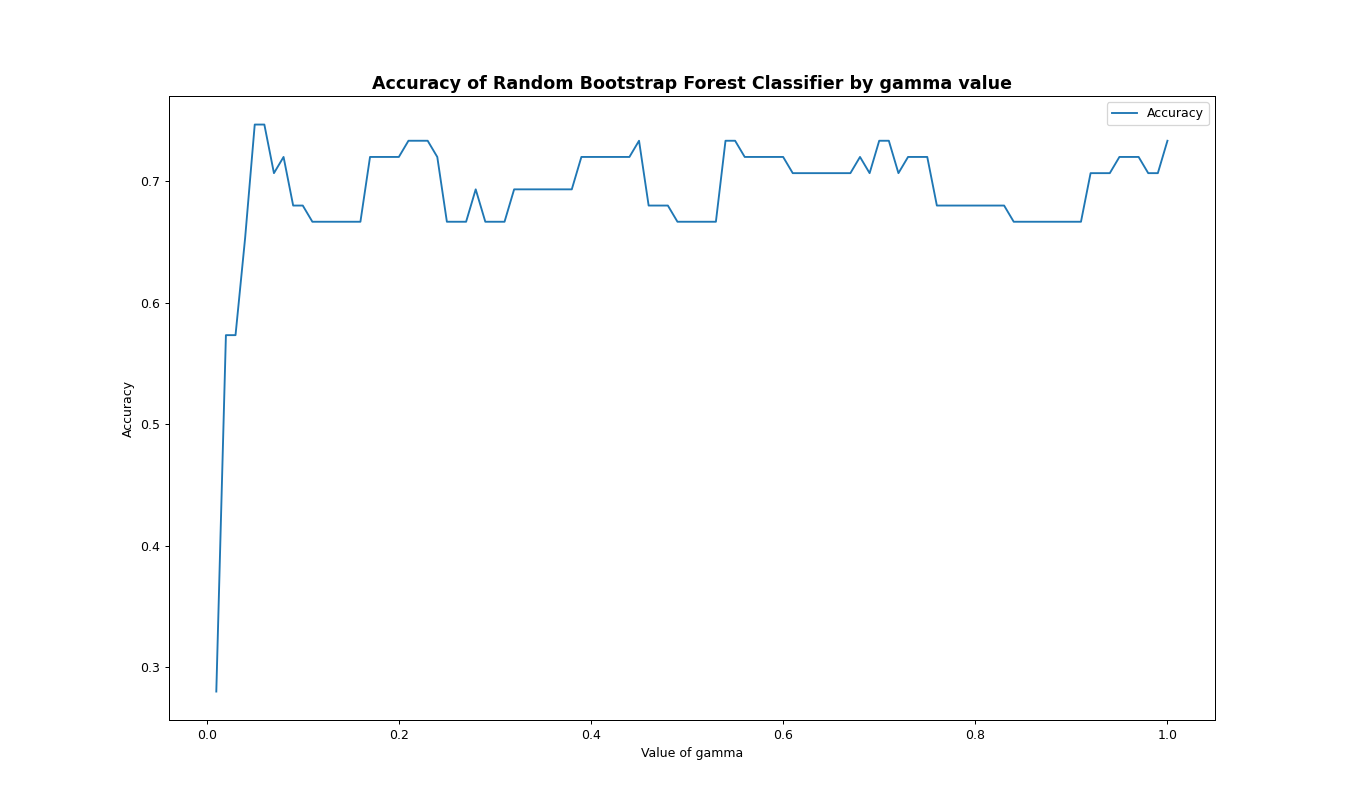

In [60]:
# Initialize the gamma value
gamma = [0.01 + 0.01 * i for i in range(100)]

# Initialize the accuracies
accuracies3 = []

# Initialize the trees of the forest
trees = []

# For all the tree depths calculate the accuracies3
for i in range(100):
    # Create a Random Bootstrap Forest classifier object
    clf = RandomForestClassifier(n_estimators=100,max_depth=best_depth,max_samples=gamma[i],bootstrap=True,random_state=int(time.time()))
    # Train the classifier with the training data
    clf.fit(X_train, Y_train)
    
    # Append the clf to the list
    trees.append(clf)
    
    # Use the classifier to make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy of the classifier
    acc = accuracy_score(Y_test, y_pred)
    
    # Append the accuracy to the list
    accuracies3.append(acc)

# ------------------------------------------------------------------------#
# PLOT OF ACCURACIES OF EVERY GAMMA VALUE

# Create the plot 
fig = plt.figure(figsize=(15,9))
plt.plot(gamma, accuracies3)
plt.title('Accuracy of Random Bootstrap Forest Classifier by gamma value', fontsize=14, fontweight='bold')
plt.xlabel('Value of gamma')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.show()

#### Presentation of Task 3:

#### Explanation
At this point, we were able to calculate the reliability of the bootsrtap tachinometer for different values of γ (from 0.01 to 1.01). Where γ (gamma), is the percentage of samples used for training in part A, which will be used each time now to create 100 new training sets one for each tree.

#### The graph
The graph consists of two axes:
* the axis of __x__, corresponding to the values of the index __γ (gamma)__
* the axis of __y__, which corresponds to the values of the accuracy index, that is, of __efficiency__

With the above graph we can understand the influence that γ (gamma) has on the performance of the algorithm. As tree depth, the most efficient of the depths, which we calculated in question 1, is used.

#### Conclusions
From the diagram, it can be seen that the efficiency of the algorithm is definitely affected by the change in the values of γ, but for values of γ greater than 0.1, it does not show particular fluctuations, when the values of γ change. The efficiency remains at values between 0.7 and 0.9 for any value of γ between 0.1 and 1.01.

Also no change is seen related to whether the values of γ are small or large (for values greater than 0.1).

The maximum is usually quite close to 0.2, which is reasonable, since with 20% of the first part training samples, we have more data resolution than the trees, since by only taking such a percentage of the sample, they widen their classification and there are more trees that have different data and can make a better conclusion with less chance of error.

In case γ is 50% or more, this means that 50% of the original sample is selected to train our classifier and results in finding a fairly similar result to the previous classifier as we increase γ.

The influence of the initial training set in general plays an important role, as does the quantity we select from its data.